# Linear Regression Model
* Polynomial Regression (without regularization)
* Ridge Regression (with L2-norm regularization)
* Lasso Regression (with L1-norm regularization)
* Elastic Net (with combined L1 & L2 norms regularization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Polynomial Regression

In [2]:
# dataset
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [3]:
# pre-processiing
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [4]:
# training model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98024708]), array([[0.8678354 , 0.49883204]]))

In [5]:
# cleate function for learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    # plot the learning curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")    

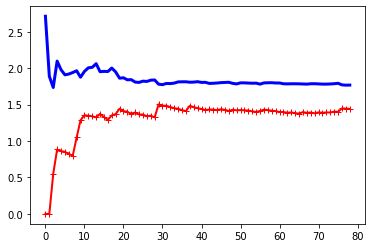

In [6]:
# plot the curves
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


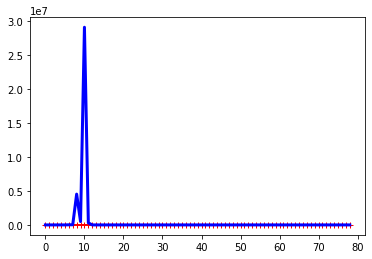

In [7]:
# 10th-degree model learning curves
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)

# Ridge Regression
Using l2 norm of the weight vector = 1/2 * alpha*Sum(theta^2) added to cost function

In [8]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [9]:
# prediction
ridge_reg.predict([[1.5]])

array([[4.91825891]])

# SGDRegressor
Specifiying parameter penalty='l2' in SGD Regressor model will behave just like Ridge

In [10]:
# using stochastic gradient descent
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.91072656])

# Lasso (Least Absolute Shrinkage and Selection)
Using l1 norm of the weight vector = alpha * Sum(theta) added to cost function

In [11]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.86783095])

# Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression.

Regularized term = r * alpha * Sum(theta)  +  (1-r)/2 * alpha * Sum(theta^2)

In [12]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86917024])